 Part 1: Data Exploration and Preprocessing

In [ ]:
`# step 1 : Importing necessary libraries Load Inspect Data

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

df = pd.read_csv('/content/Customer_data - customer_data.csv')

df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#step 2 Data Summary & missing values

df.info()

#check missing values

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# step 3:Handle missing values of "Total Charges" and drop "customer ID " (not usefull)

df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace =True)
print(df.isnull().sum())

df.drop('customerID',axis =1,inplace=True)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-4-951465001>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace =True)


In [ ]:
# Step 4 : Encode Categorical Variables and feature scaling

cat_columns = ['gender','Churn','Partner','Dependents','PhoneService','PaperlessBilling','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for col in cat_columns:
  df[col] = LabelEncoder().fit_transform(df[col])

scaler = StandardScaler()
df[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(df[['tenure','MonthlyCharges','TotalCharges']])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994971,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173876,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.960399,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.195400,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.941193,1


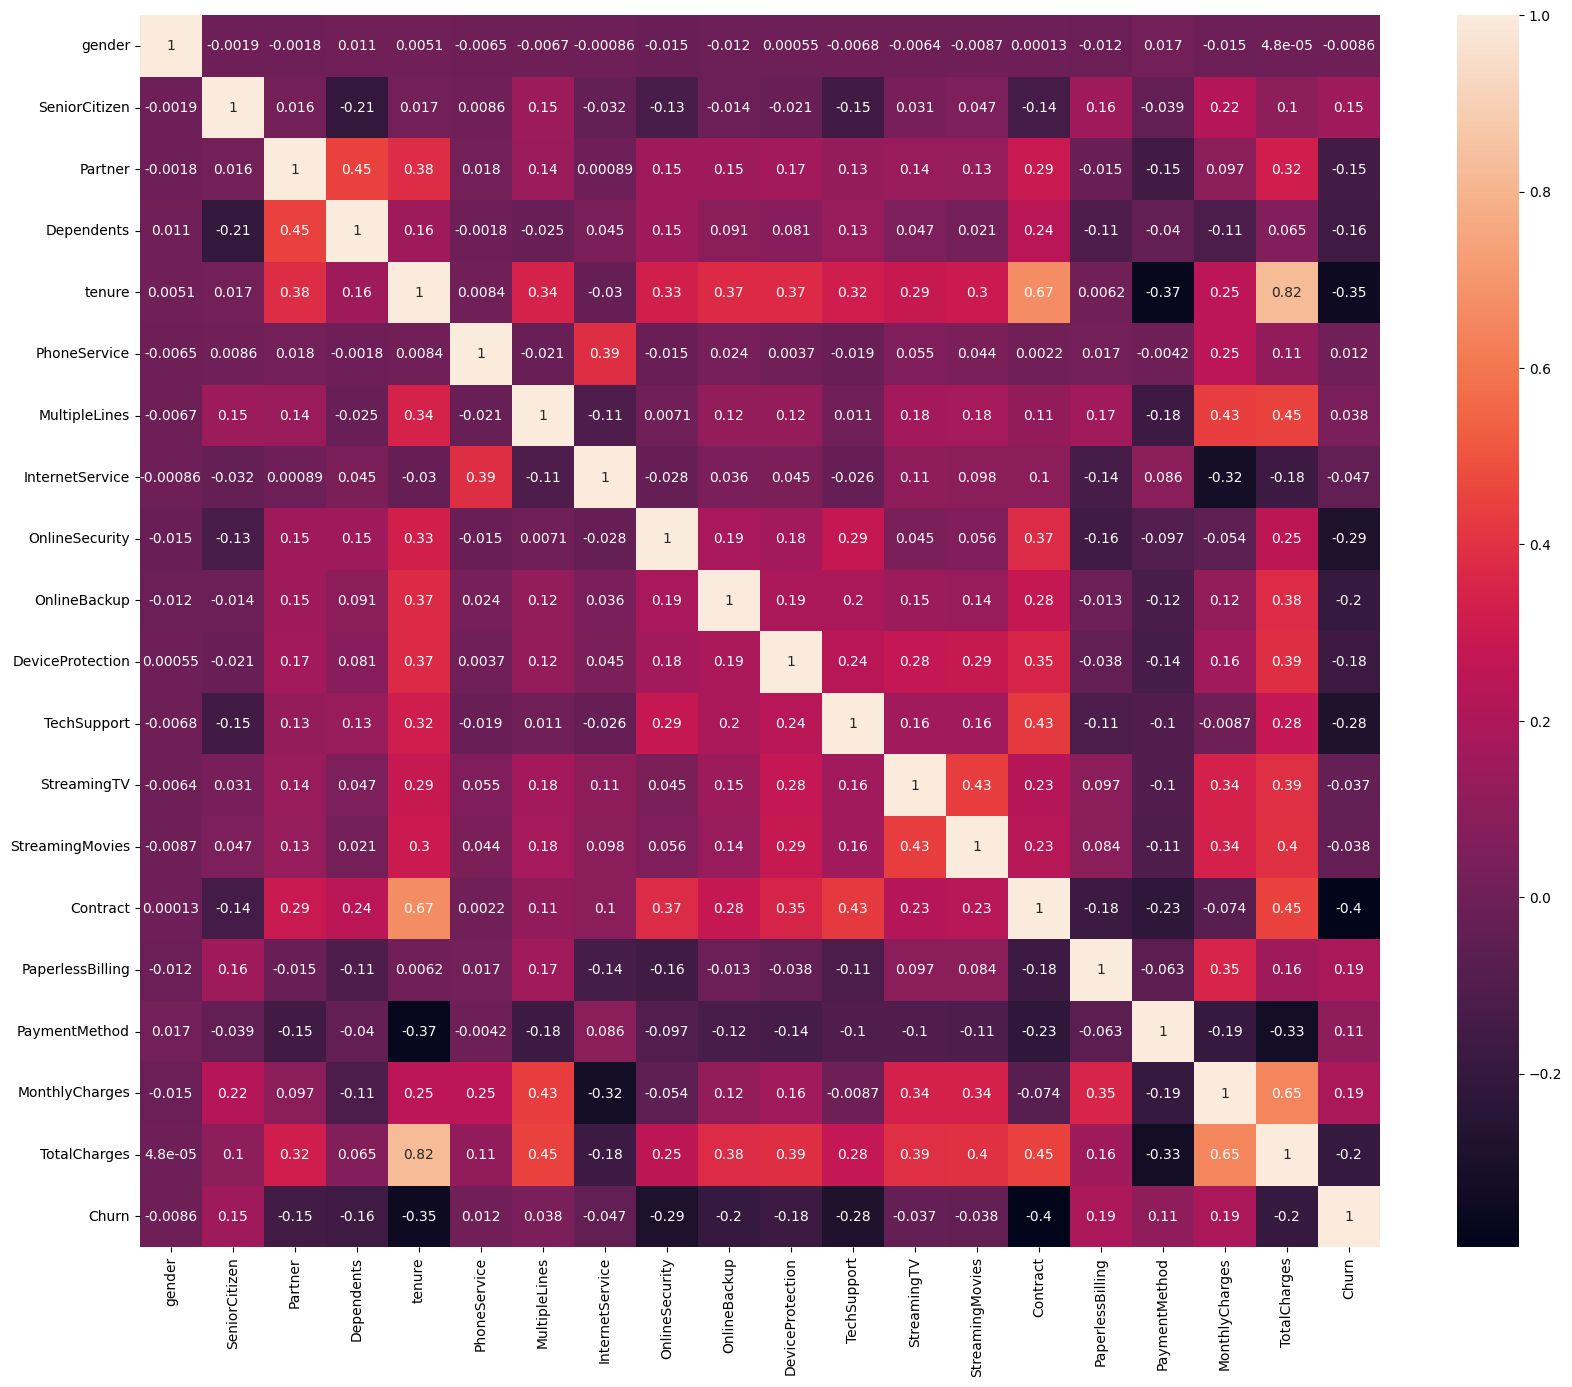

In [ ]:
#step 5: Compute correlation matrix and plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True)
plt.show()


 Part 2: Model Development

In [ ]:
# Step 1: Train and test split

x = df.drop('Churn',axis=1)
y = df['Churn']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.21,random_state=42)

In [ ]:
# Step 2: Build a Random Forest model

model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Step 3 : Evaluate the model

y_pred = model.predict(x_test)

print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))

print('\nclassification Report:')
print(classification_report(y_test,y_pred))



Confusion Matrix:
[[988 101]
 [210 181]]

classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1089
           1       0.64      0.46      0.54       391

    accuracy                           0.79      1480
   macro avg       0.73      0.69      0.70      1480
weighted avg       0.78      0.79      0.78      1480

